In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import pandas as pd

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Convert 'created_at' from epoch to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Find the first and last date in the dataset
first_date = df['created_at'].min()
last_date = df['created_at'].max()

print("First Date:", first_date)
print("Last Date:", last_date)


First Date: 2023-08-29 11:53:20
Last Date: 2024-05-09 10:20:00


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv
General Transaction Success Rate (TSR): 99.13%
Transaction Success Rate (TSR) by Month:
  month_year       TSR
0    2023-12  0.999908
1    2024-01  1.000000
2    2024-02  0.999127
3    2024-03  0.986690
4    2024-04  0.984772
5    2024-05  0.992442


/tmp/ipykernel_33/2029241824.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_tsr = df.groupby('month_year').apply(lambda x: x[x['transaction_status'] == 2].shape[0] / x.shape[0]).reset_index(name='TSR')


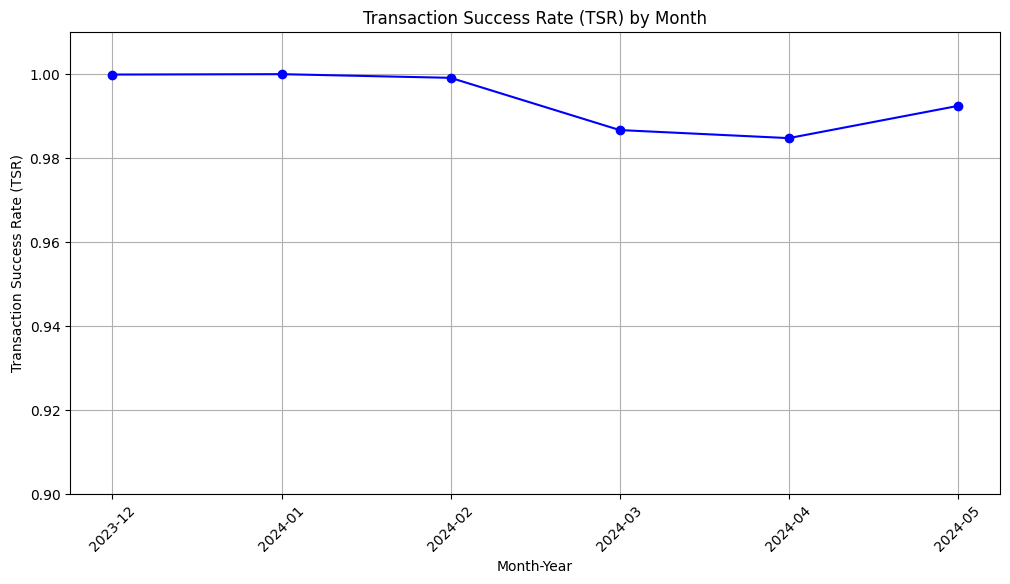

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Exclude specific transaction IDs
exclude_ids = [153, 154, 1030, 4857, 6557, 12007, 13699, 14876, 18582, 28289, 31424]
df = df[~df['id'].isin(exclude_ids)]

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Filter the data for the period from December 2023 to May 2024
start_date = '2023-12-01'
end_date = '2024-05-31'
df = df[(df['created_at'] >= start_date) & (df['created_at'] <= end_date)]

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Calculate the general Transaction Success Rate (TSR)
valid_transactions = df[df['transaction_status'] == 2].shape[0]
total_transactions = df.shape[0]
general_tsr = valid_transactions / total_transactions

print(f"General Transaction Success Rate (TSR): {general_tsr:.2%}")

# Calculate TSR by month
monthly_tsr = df.groupby('month_year').apply(lambda x: x[x['transaction_status'] == 2].shape[0] / x.shape[0]).reset_index(name='TSR')

# Print TSR by month
print("Transaction Success Rate (TSR) by Month:")
print(monthly_tsr)

# Plot TSR by month
plt.figure(figsize=(12, 6))
plt.plot(monthly_tsr['month_year'].astype(str), monthly_tsr['TSR'], marker='o', linestyle='-', color='b')
plt.xlabel('Month-Year')
plt.ylabel('Transaction Success Rate (TSR)')
plt.title('Transaction Success Rate (TSR) by Month')
plt.ylim(0.9, 1.01)  # Set y-axis limits between 0.9 and 1.0
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv
Average Transaction Value (ATV) by Month:
  month_year           ATV
0    2023-12  14833.191616
1    2024-01  14637.329283
2    2024-02  14621.170479
3    2024-03  14863.526289
4    2024-04  13893.531631
5    2024-05  17094.298382


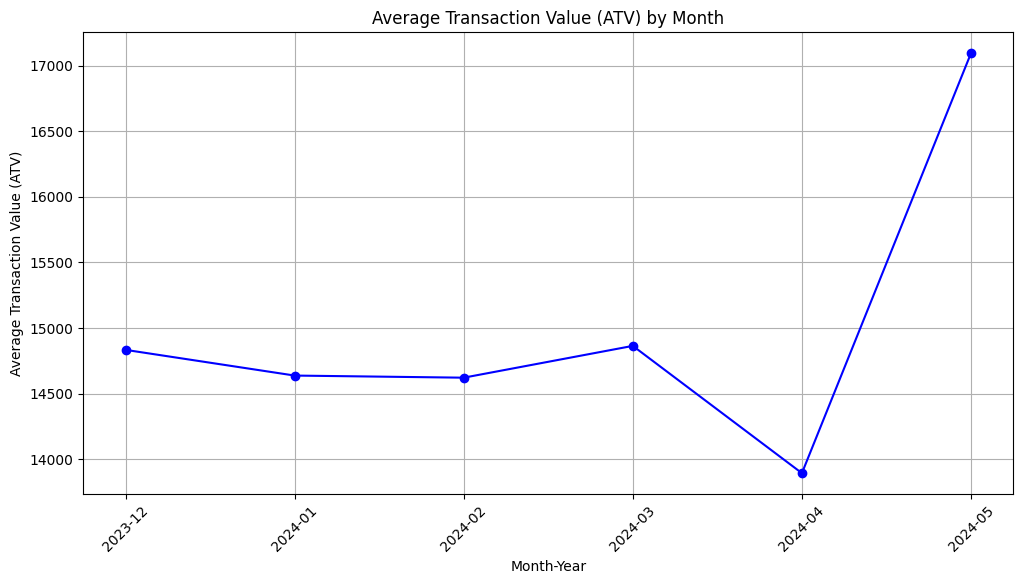

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Exclude specific transaction IDs
exclude_ids = [153, 154, 1030, 4857, 6557, 12007, 13699, 14876, 18582, 28289, 31424]
df = df[~df['id'].isin(exclude_ids)]

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Filter the data for the period from December 2023 to May 2024
start_date = '2023-12-01'
end_date = '2024-05-31'
df = df[(df['created_at'] >= start_date) & (df['created_at'] <= end_date)]

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Calculate Average Transaction Value (ATV) by month
monthly_atv = df[df['transaction_status'] == 2].groupby('month_year').agg(
    total_valid_amount=('transaction_total', 'sum'),
    num_valid_transactions=('transaction_total', 'count')
).reset_index()

monthly_atv['ATV'] = monthly_atv['total_valid_amount'] / monthly_atv['num_valid_transactions']

# Print ATV by month
print("Average Transaction Value (ATV) by Month:")
print(monthly_atv[['month_year', 'ATV']])

# Plot ATV by month
plt.figure(figsize=(12, 6))
plt.plot(monthly_atv['month_year'].astype(str), monthly_atv['ATV'], marker='o', linestyle='-', color='b')
plt.xlabel('Month-Year')
plt.ylabel('Average Transaction Value (ATV)')
plt.title('Average Transaction Value (ATV) by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv
Percentage Growth in Revenue by Month compared to December 2023:
  month_year  pct_growth_revenue
0    2023-12            0.000000
1    2024-01           -8.380611
2    2024-02           86.155816
3    2024-03          319.724705
4    2024-04           83.343824
5    2024-05          167.728279


/tmp/ipykernel_33/2475866621.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '432947295.1111111' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  monthly_revenue.loc[monthly_revenue['month_year'] == '2024-05', 'total_revenue'] = normalized_may_2024_revenue


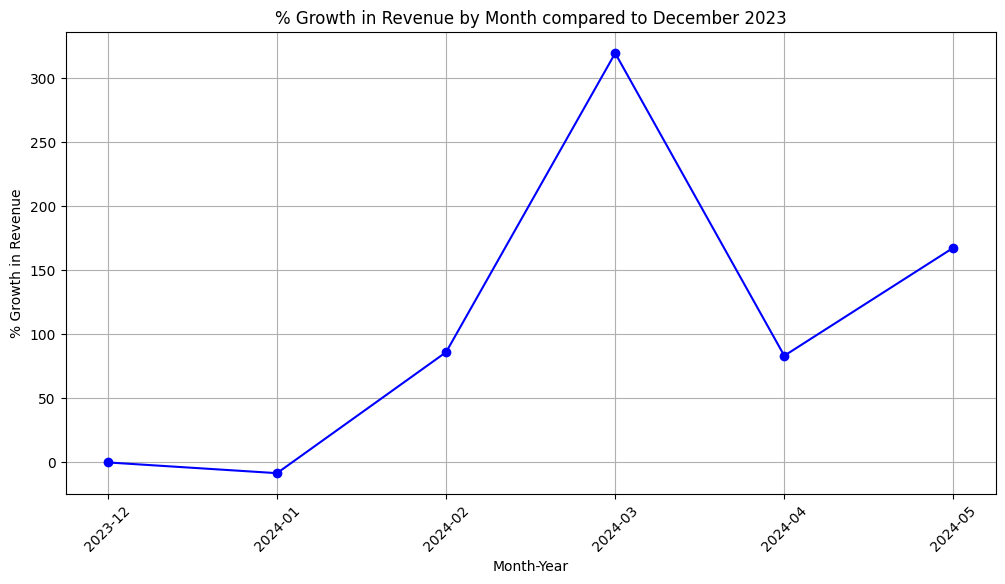

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Exclude specific transaction IDs
exclude_ids = [153, 154, 1030, 4857, 6557, 12007, 13699, 14876, 18582, 28289, 31424]
df = df[~df['id'].isin(exclude_ids)]

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Filter the data for the period from December 2023 to May 2024
start_date = '2023-12-01'
end_date = '2024-05-31'
df = df[(df['created_at'] >= start_date) & (df['created_at'] <= end_date)]

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Filter for valid transactions
valid_transactions_df = df[df['transaction_status'] == 2]

# Calculate the total transaction amount for each month
monthly_revenue = valid_transactions_df.groupby('month_year').agg(
    total_revenue=('transaction_total', 'sum')
).reset_index()

# Normalize the revenue for May 2024 to reflect a full month
may_2024_days = valid_transactions_df[valid_transactions_df['month_year'] == '2024-05']['created_at'].dt.day.max()
days_in_may = 31
may_2024_revenue = monthly_revenue[monthly_revenue['month_year'] == '2024-05']['total_revenue'].values[0]
normalized_may_2024_revenue = (may_2024_revenue / may_2024_days) * days_in_may
monthly_revenue.loc[monthly_revenue['month_year'] == '2024-05', 'total_revenue'] = normalized_may_2024_revenue

# Calculate the percentage growth in revenue by month compared to December 2023
dec_2023_revenue = monthly_revenue[monthly_revenue['month_year'] == '2023-12']['total_revenue'].values[0]
monthly_revenue['pct_growth_revenue'] = ((monthly_revenue['total_revenue'] - dec_2023_revenue) / dec_2023_revenue) * 100

# Print the percentage growth in revenue by month
print("Percentage Growth in Revenue by Month compared to December 2023:")
print(monthly_revenue[['month_year', 'pct_growth_revenue']])

# Plot percentage growth in revenue by month
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['month_year'].astype(str), monthly_revenue['pct_growth_revenue'], marker='o', linestyle='-', color='b')
plt.xlabel('Month-Year')
plt.ylabel('% Growth in Revenue')
plt.title('% Growth in Revenue by Month compared to December 2023')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv
Dollar Transaction Success Rate (DTSR) by Month:
  month_year      DTSR
0    2023-12  0.999969
1    2024-01  1.000000
2    2024-02  0.999457
3    2024-03  0.986155
4    2024-04  0.987704
5    2024-05  0.994750


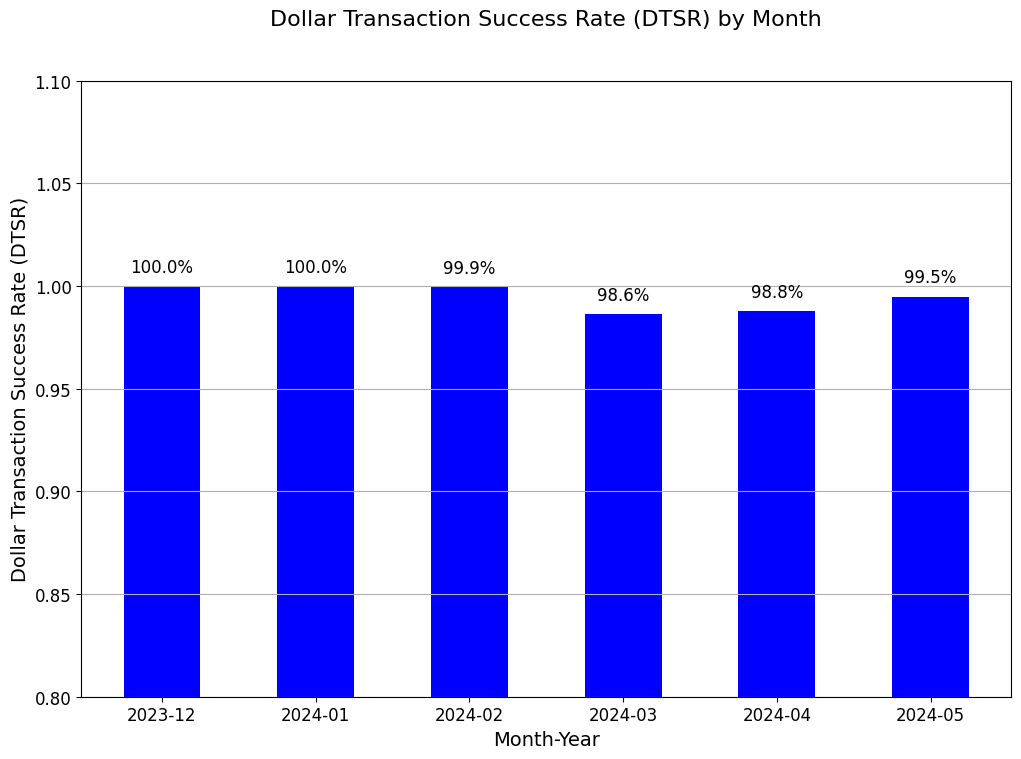

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Exclude specific transaction IDs
exclude_ids = [153, 154, 1030, 4857, 6557, 12007, 13699, 14876, 18582, 28289, 31424]
df = df[~df['id'].isin(exclude_ids)]

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Filter the data for the period from December 2023 to May 2024
start_date = '2023-12-01'
end_date = '2024-05-31'
df = df[(df['created_at'] >= start_date) & (df['created_at'] <= end_date)]

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Calculate the total transaction amount and valid transaction amount by month
monthly_totals = df.groupby('month_year').agg(
    total_amount=('transaction_total', 'sum'),
    valid_amount=('transaction_total', lambda x: x[df['transaction_status'] == 2].sum())
).reset_index()

# Calculate the Dollar Transaction Success Rate (DTSR)
monthly_totals['DTSR'] = monthly_totals['valid_amount'] / monthly_totals['total_amount']

# Print DTSR by month
print("Dollar Transaction Success Rate (DTSR) by Month:")
print(monthly_totals[['month_year', 'DTSR']])

# Plot DTSR by month with normal size and vertical bars
plt.figure(figsize=(12, 8))  # Adjust the figure size for better visibility
bars = plt.bar(monthly_totals['month_year'].astype(str), monthly_totals['DTSR'], color='b', width=0.5)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Dollar Transaction Success Rate (DTSR)', fontsize=14)
plt.title('Dollar Transaction Success Rate (DTSR) by Month', fontsize=16, pad=40)  # Move title up by increasing pad
plt.ylim(0.8, 1.1)  # Set y-axis limits between 0.8 and 1.1
plt.grid(True, axis='y')

# Adding data point labels
for bar, row in zip(bars, monthly_totals.itertuples()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{row.DTSR:.1%}', ha='center', va='bottom', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


ERROR: Could not find a version that satisfies the requirement selenium (from versions: none)
ERROR: No matching distribution found for selenium


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv
Number of distinct users by month:
  month_year      buyer_id
0    2024-02   9816.000000
1    2024-03  41764.000000
2    2024-04  20040.000000
3    2024-05  24624.333333


/tmp/ipykernel_32/2125505159.py:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '24624.333333333336' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  distinct_users_by_month.loc[distinct_users_by_month['month_year'] == '2024-05', 'buyer_id'] = normalized_distinct_users_may_2024


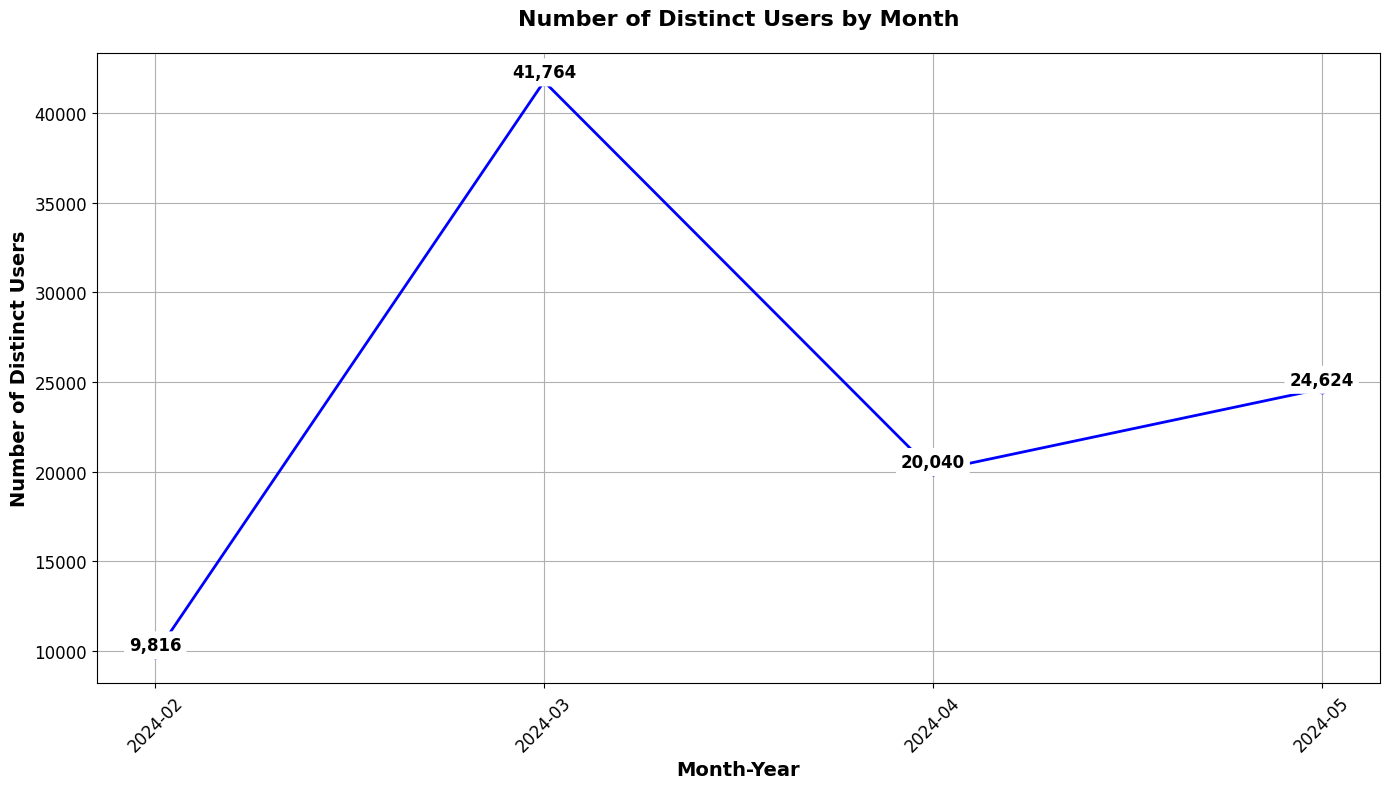

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Exclude specific transaction IDs
exclude_ids = [153, 154, 1030, 4857, 6557, 12007, 13699, 14876, 18582, 28289, 31424]
df = df[~df['id'].isin(exclude_ids)]

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Filter the data for the period from February 2024 to May 2024
start_date = '2024-02-01'
end_date = '2024-05-31'
df = df[(df['created_at'] >= start_date) & (df['created_at'] <= end_date)]

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Filter for valid transactions
valid_transactions_df = df[df['transaction_status'] == 2]

# Calculate the number of distinct users by month
distinct_users_by_month = valid_transactions_df.groupby('month_year')['buyer_id'].nunique().reset_index()

# Normalize the number of distinct users for May 2024
may_2024_days = valid_transactions_df[valid_transactions_df['month_year'] == '2024-05']['created_at'].dt.day.max()
days_in_may = 31
distinct_users_may_2024 = distinct_users_by_month[distinct_users_by_month['month_year'] == '2024-05']['buyer_id'].values[0]
normalized_distinct_users_may_2024 = (distinct_users_may_2024 / may_2024_days) * days_in_may
distinct_users_by_month.loc[distinct_users_by_month['month_year'] == '2024-05', 'buyer_id'] = normalized_distinct_users_may_2024

# Calculate average and standard deviation
average_users = distinct_users_by_month['buyer_id'].mean()
std_dev_users = distinct_users_by_month['buyer_id'].std()

# Apply the reasonableness check
threshold = 2 * std_dev_users
valid_months = distinct_users_by_month[abs(distinct_users_by_month['buyer_id'] - average_users) <= threshold]

# Print the number of distinct users by month
print("Number of distinct users by month:")
print(valid_months)

# Plot the number of distinct users by month with improved aesthetics
plt.figure(figsize=(14, 8))
plt.plot(valid_months['month_year'].astype(str), valid_months['buyer_id'], marker='o', linestyle='-', color='b', linewidth=2)

plt.xlabel('Month-Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Distinct Users', fontsize=14, fontweight='bold')
plt.title('Number of Distinct Users by Month', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adding data point labels and custom text for May 2024
for i, row in valid_months.iterrows():
    label = f'{int(row["buyer_id"]):,}'
    if row['month_year'] == '2024-05':
        label += ' (normalized)'
    plt.text(i, row['buyer_id'], label, ha='center', va='bottom', fontsize=12, fontweight='bold', color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv
Monthly profit from December 2023 to April 2024:
  month_year       profit
0    2023-12   8085572.75
1    2024-01   7407952.35
2    2024-02  15051763.95
3    2024-03  33937146.40
4    2024-04  14063110.45


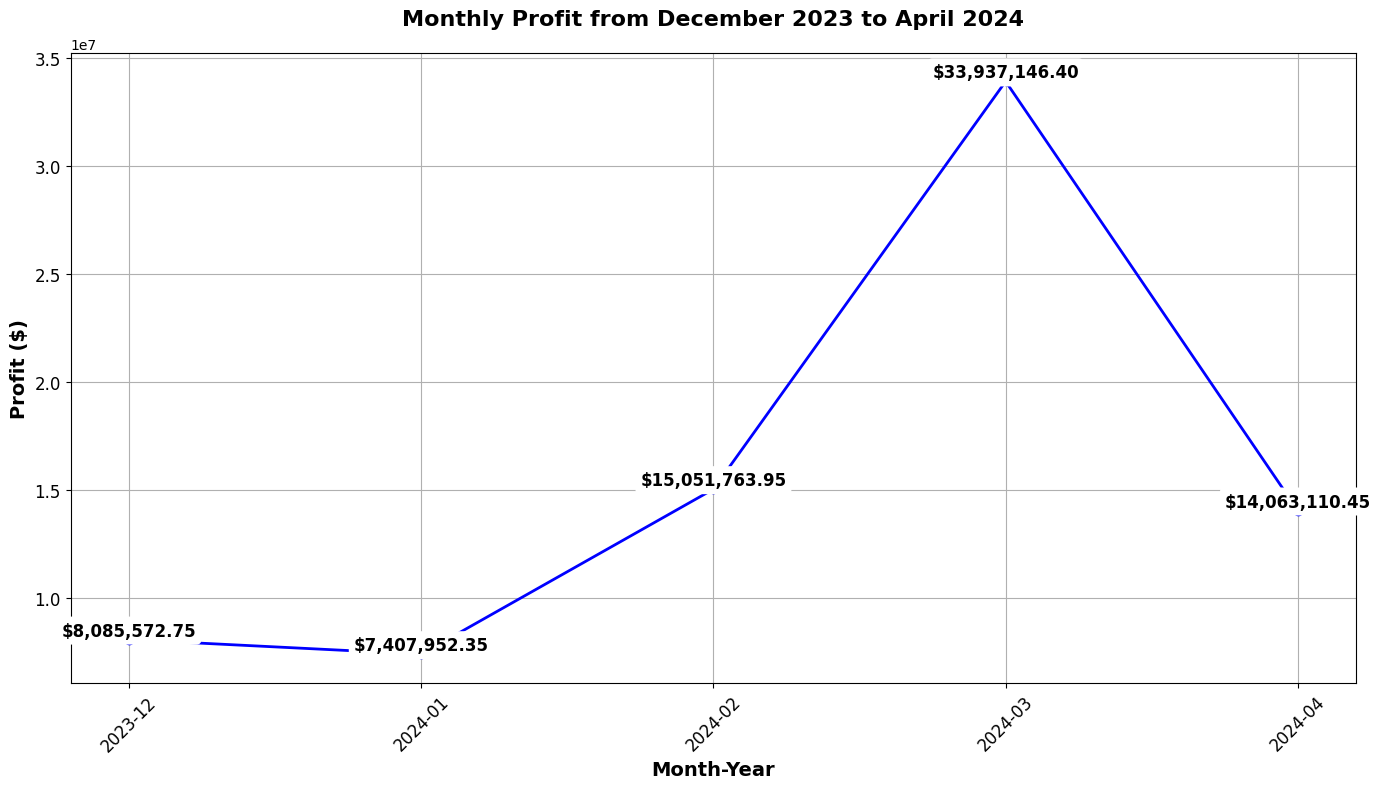

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Exclude specific transaction IDs
exclude_ids = [153, 154, 1030, 4857, 6557, 12007, 13699, 14876, 18582, 28289, 31424]
df = df[~df['id'].isin(exclude_ids)]

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Filter the data for the period from December 2023 to April 2024
start_date = '2023-12-01'
end_date = '2024-04-30'
df = df[(df['created_at'] >= start_date) & (df['created_at'] <= end_date)]

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Filter for valid transactions
valid_transactions_df = df[df['transaction_status'] == 2]

# Calculate the monthly revenue and profit
monthly_revenue = valid_transactions_df.groupby('month_year')['transaction_total'].sum().reset_index()
monthly_revenue['profit'] = monthly_revenue['transaction_total'] * 0.05

# Print the monthly profit
print("Monthly profit from December 2023 to April 2024:")
print(monthly_revenue[['month_year', 'profit']])

# Plot the monthly profit with improved aesthetics
plt.figure(figsize=(14, 8))
plt.plot(monthly_revenue['month_year'].astype(str), monthly_revenue['profit'], marker='o', linestyle='-', color='b', linewidth=2)

plt.xlabel('Month-Year', fontsize=14, fontweight='bold')
plt.ylabel('Profit ($)', fontsize=14, fontweight='bold')
plt.title('Monthly Profit from December 2023 to April 2024', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adding data point labels
for i, row in monthly_revenue.iterrows():
    label = f'${row["profit"]:,.2f}'
    plt.text(i, row['profit'], label, ha='center', va='bottom', fontsize=12, fontweight='bold', color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()


In [1]:
# Exclude specific transaction IDs
exclude_ids = [153, 154, 1030, 4857, 6557, 12007, 13699, 14876, 18582, 28289, 31424]
df = df[~df['id'].isin(exclude_ids)]

# Convert 'readable_created_at' to datetime
df['readable_created_at'] = pd.to_datetime(df['readable_created_at'])

# Filter the data for the period from December 2023 to May 2024
start_date = '2023-12-01'
end_date = '2024-05-31'
df = df[(df['readable_created_at'] >= start_date) & (df['readable_created_at'] <= end_date)]

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['readable_created_at'].dt.to_period('M')

# Filter for valid transactions
valid_transactions_df = df[df['transaction_status'] == 2]

# Calculate the TSR by month
monthly_tsr = valid_transactions_df.groupby('month_year').size() / df.groupby('month_year').size()
monthly_tsr = monthly_tsr.reset_index(name='tsr')

# Normalize the TSR for May 2024
may_2024_days = valid_transactions_df[valid_transactions_df['month_year'] == '2024-05']['readable_created_at'].dt.day.max()
days_in_may = 31
normalized_may_2024_tsr = (monthly_tsr.loc[monthly_tsr['month_year'] == '2024-05', 'tsr'].values[0] / may_2024_days) * days_in_may
monthly_tsr.loc[monthly_tsr['month_year'] == '2024-05', 'tsr'] = normalized_may_2024_tsr

# Calculate the average monthly TSR and score
average_tsr = monthly_tsr['tsr'].mean()
tsr_score = 'High' if average_tsr >= 0.95 else 'Medium' if average_tsr >= 0.90 else 'Low'

# Print the average monthly TSR and score
print("Average Monthly TSR:", average_tsr)
print("Score:", tsr_score)
print("Included Months:", monthly_tsr['month_year'].astype(str).tolist())


NameError: name 'df' is not defined

/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv
General Transaction Success Rate (TSR): 99.13%
Transaction Success Rate (TSR) by Month:
  month_year       TSR
0    2023-12  0.999908
1    2024-01  1.000000
2    2024-02  0.999127
3    2024-03  0.986690
4    2024-04  0.984772
5    2024-05  0.992442


/tmp/ipykernel_33/209719671.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_tsr = df.groupby('month_year').apply(lambda x: x[x['transaction_status'] == 2].shape[0] / x.shape[0]).reset_index(name='TSR')


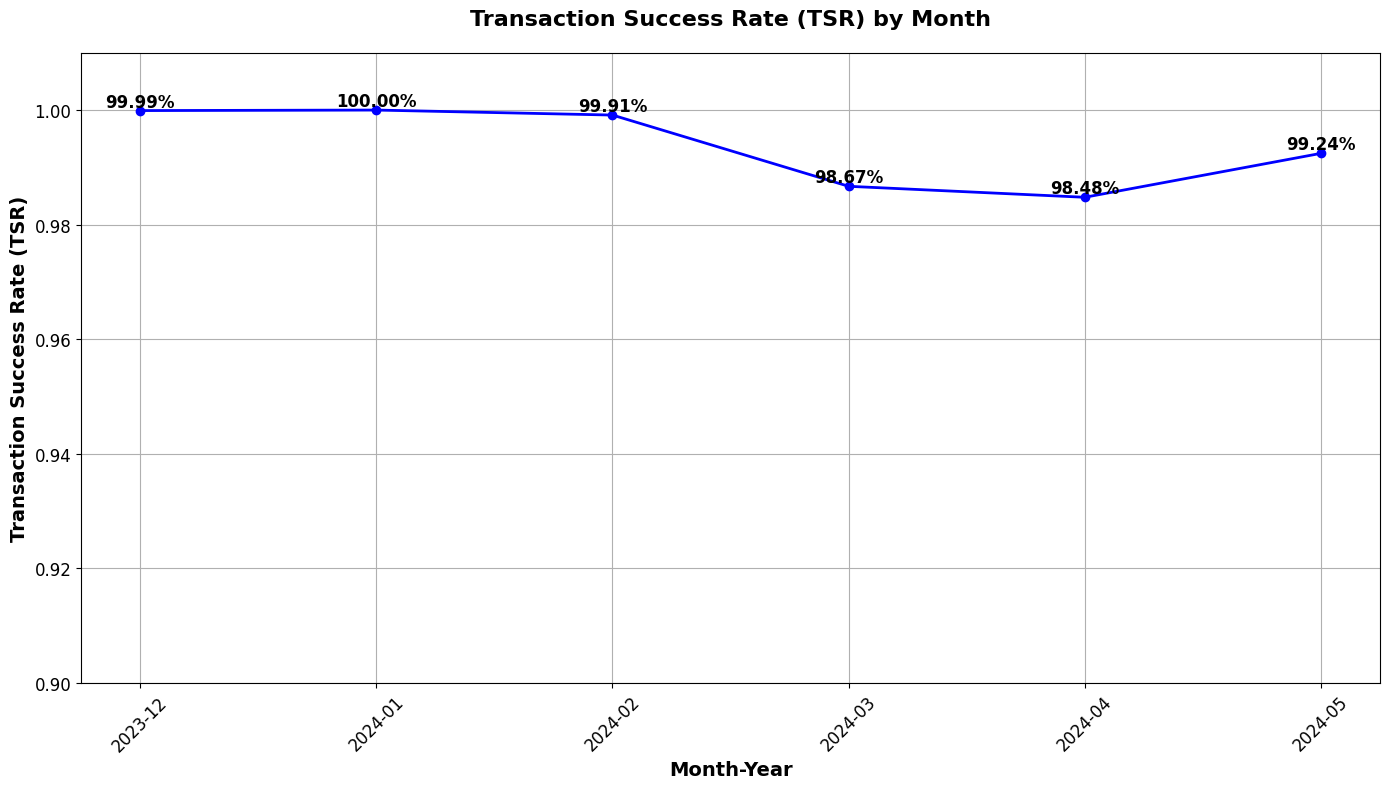

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Exclude specific transaction IDs
exclude_ids = [153, 154, 1030, 4857, 6557, 12007, 13699, 14876, 18582, 28289, 31424]
df = df[~df['id'].isin(exclude_ids)]

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Filter the data for the period from December 2023 to May 2024
start_date = '2023-12-01'
end_date = '2024-05-31'
df = df[(df['created_at'] >= start_date) & (df['created_at'] <= end_date)]

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Calculate the general Transaction Success Rate (TSR)
valid_transactions = df[df['transaction_status'] == 2].shape[0]
total_transactions = df.shape[0]
general_tsr = valid_transactions / total_transactions

print(f"General Transaction Success Rate (TSR): {general_tsr:.2%}")

# Calculate TSR by month
monthly_tsr = df.groupby('month_year').apply(lambda x: x[x['transaction_status'] == 2].shape[0] / x.shape[0]).reset_index(name='TSR')

# Print TSR by month
print("Transaction Success Rate (TSR) by Month:")
print(monthly_tsr)

# Plot TSR by month with improved aesthetics
plt.figure(figsize=(14, 8))
plt.plot(monthly_tsr['month_year'].astype(str), monthly_tsr['TSR'], marker='o', linestyle='-', color='b', linewidth=2)

plt.xlabel('Month-Year', fontsize=14, fontweight='bold')
plt.ylabel('Transaction Success Rate (TSR)', fontsize=14, fontweight='bold')
plt.title('Transaction Success Rate (TSR) by Month', fontsize=16, fontweight='bold', pad=20)
plt.ylim(0.9, 1.01)  # Set y-axis limits between 0.9 and 1.01
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adding data point labels
for i, row in monthly_tsr.iterrows():
    plt.text(i, row['TSR'], f'{row["TSR"]:.2%}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv
Dollar Transaction Success Rate (DTSR) by Transaction Brand ID:
   transaction_brand_id      DTSR
0                     1  0.967005
1                     2  1.000000
3                     8  0.993808
4                    16  0.991054
5                    32  0.993045


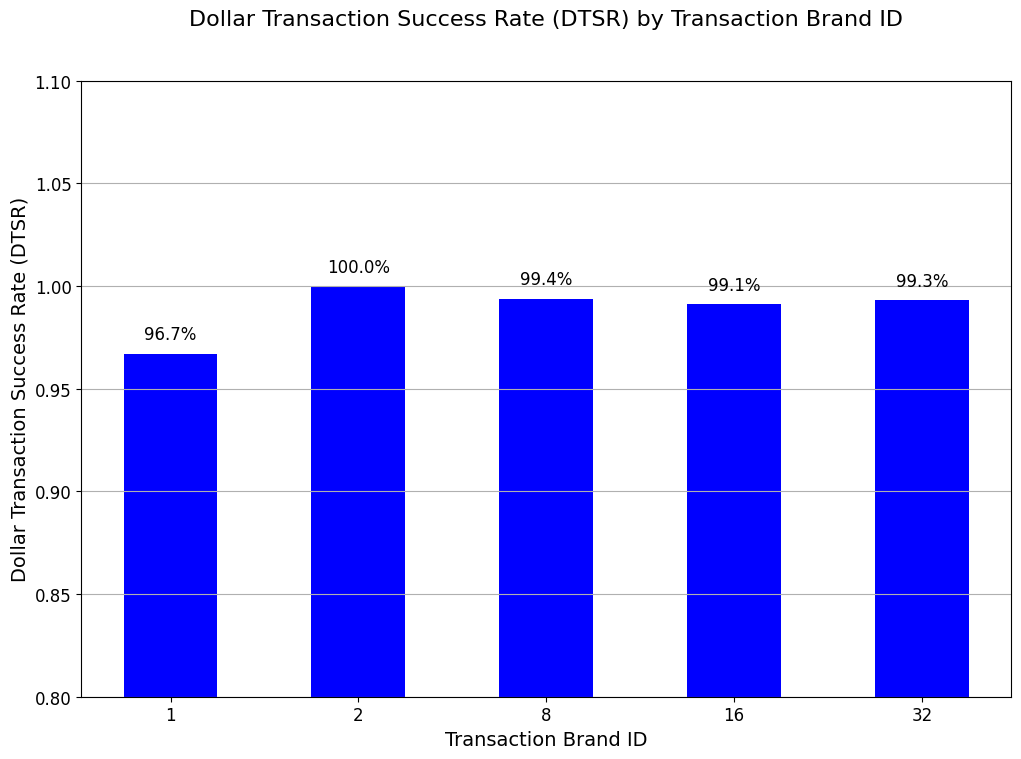

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Exclude specific transaction IDs
exclude_ids = [153, 154, 1030, 4857, 6557, 12007, 13699, 14876, 18582, 28289, 31424]
df = df[~df['id'].isin(exclude_ids)]

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Calculate the total transaction amount and valid transaction amount by transaction brand ID
totals_by_brand = df.groupby('transaction_brand_id').agg(
    total_amount=('transaction_total', 'sum'),
    valid_amount=('transaction_total', lambda x: x[df['transaction_status'] == 2].sum()),
    transaction_count=('id', 'count')
).reset_index()

# Exclude brands with less than 30 transactions
totals_by_brand = totals_by_brand[totals_by_brand['transaction_count'] >= 30]

# Calculate the Dollar Transaction Success Rate (DTSR)
totals_by_brand['DTSR'] = totals_by_brand['valid_amount'] / totals_by_brand['total_amount']

# Print DTSR by transaction brand ID
print("Dollar Transaction Success Rate (DTSR) by Transaction Brand ID:")
print(totals_by_brand[['transaction_brand_id', 'DTSR']])

# Plot DTSR by transaction brand ID with normal size and vertical bars
plt.figure(figsize=(12, 8))  # Adjust the figure size for better visibility
bars = plt.bar(totals_by_brand['transaction_brand_id'].astype(str), totals_by_brand['DTSR'], color='b', width=0.5)
plt.xlabel('Transaction Brand ID', fontsize=14)
plt.ylabel('Dollar Transaction Success Rate (DTSR)', fontsize=14)
plt.title('Dollar Transaction Success Rate (DTSR) by Transaction Brand ID', fontsize=16, pad=40)  # Move title up by increasing pad
plt.ylim(0.8, 1.1)  # Set y-axis limits between 0.8 and 1.1
plt.grid(True, axis='y')

# Adding data point labels
for bar, row in zip(bars, totals_by_brand.itertuples()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{row.DTSR:.1%}', ha='center', va='bottom', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv
Dollar Transaction Success Rate (DTSR) by Month:
  month_year      DTSR
0    2023-12  0.999969
1    2024-01  1.000000
2    2024-02  0.999457
3    2024-03  0.986155
4    2024-04  0.987704
5    2024-05  0.994750


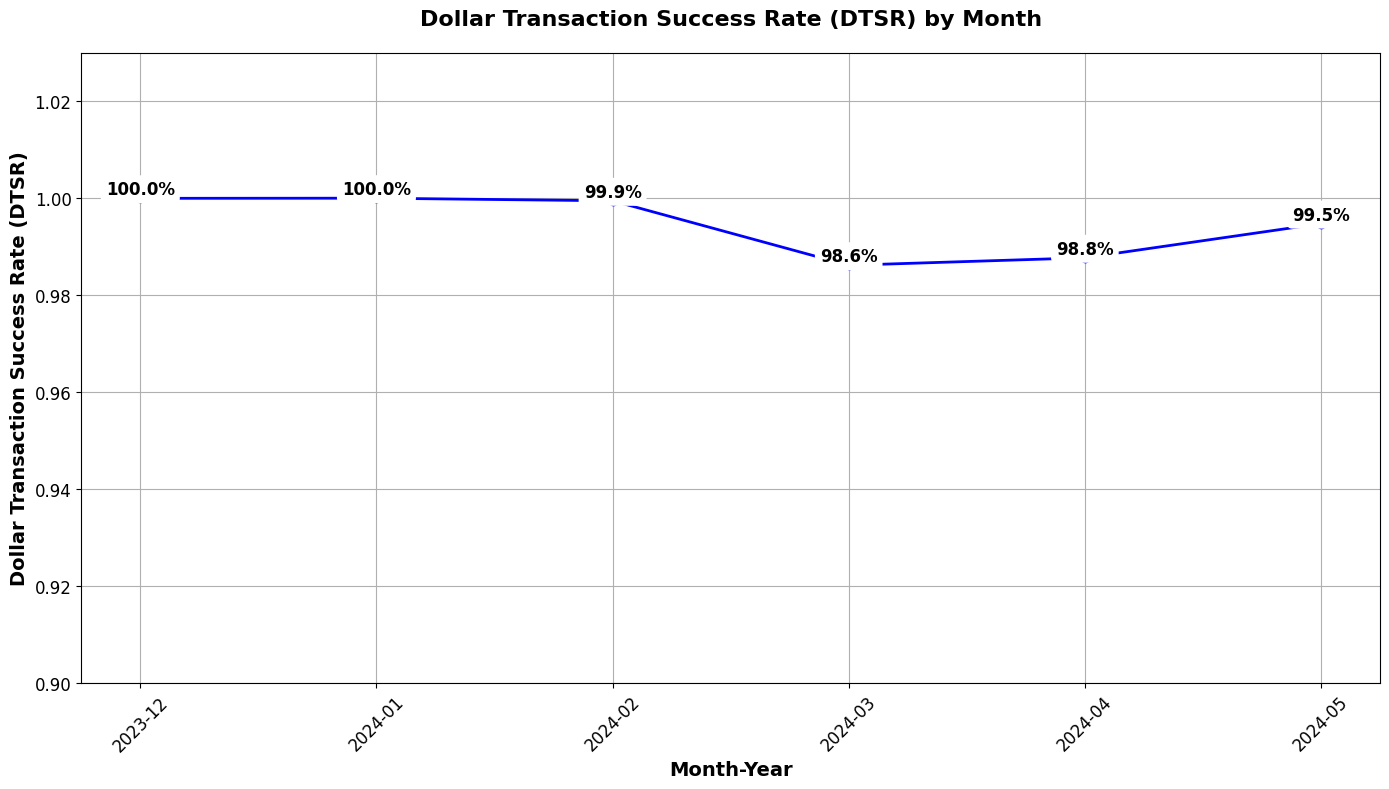

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Exclude specific transaction IDs
exclude_ids = [153, 154, 1030, 4857, 6557, 12007, 13699, 14876, 18582, 28289, 31424]
df = df[~df['id'].isin(exclude_ids)]

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Filter the data for the period from December 2023 to May 2024
start_date = '2023-12-01'
end_date = '2024-05-31'
df = df[(df['created_at'] >= start_date) & (df['created_at'] <= end_date)]

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Calculate the total transaction amount and valid transaction amount by month
monthly_totals = df.groupby('month_year').agg(
    total_amount=('transaction_total', 'sum'),
    valid_amount=('transaction_total', lambda x: x[df['transaction_status'] == 2].sum())
).reset_index()

# Calculate the Dollar Transaction Success Rate (DTSR)
monthly_totals['DTSR'] = monthly_totals['valid_amount'] / monthly_totals['total_amount']

# Print DTSR by month
print("Dollar Transaction Success Rate (DTSR) by Month:")
print(monthly_totals[['month_year', 'DTSR']])

# Plot DTSR by month with improved aesthetics
plt.figure(figsize=(14, 8))
plt.plot(monthly_totals['month_year'].astype(str), monthly_totals['DTSR'], marker='o', linestyle='-', color='b', linewidth=2)

plt.xlabel('Month-Year', fontsize=14, fontweight='bold')
plt.ylabel('Dollar Transaction Success Rate (DTSR)', fontsize=14, fontweight='bold')
plt.title('Dollar Transaction Success Rate (DTSR) by Month', fontsize=16, fontweight='bold', pad=20)
plt.ylim(0.9, 1.03)  # Set y-axis limits between 0.9 and 1.03
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adding data point labels
for i, row in monthly_totals.iterrows():
    plt.text(i, row['DTSR'], f'{row["DTSR"]:.1%}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv
Monthly revenue from December 2023 to April 2024:
  month_year  transaction_total
0    2023-12          161711455
1    2024-01          148159047
2    2024-02          301035279
3    2024-03          678742928
4    2024-04          281262209


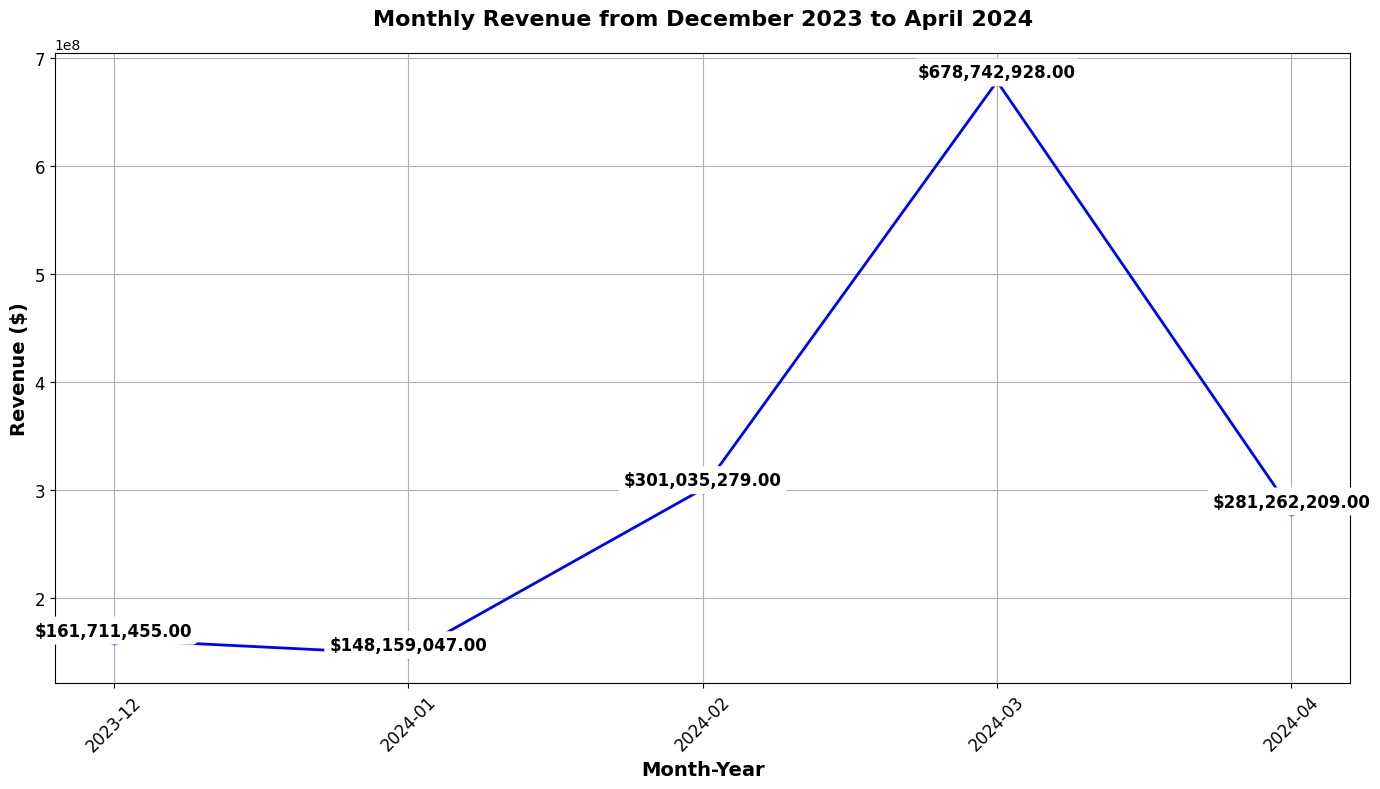

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Exclude specific transaction IDs
exclude_ids = [153, 154, 1030, 4857, 6557, 12007, 13699, 14876, 18582, 28289, 31424]
df = df[~df['id'].isin(exclude_ids)]

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Filter the data for the period from December 2023 to April 2024
start_date = '2023-12-01'
end_date = '2024-04-30'
df = df[(df['created_at'] >= start_date) & (df['created_at'] <= end_date)]

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Filter for valid transactions
valid_transactions_df = df[df['transaction_status'] == 2]

# Calculate the monthly revenue
monthly_revenue = valid_transactions_df.groupby('month_year')['transaction_total'].sum().reset_index()

# Print the monthly revenue
print("Monthly revenue from December 2023 to April 2024:")
print(monthly_revenue)

# Plot the monthly revenue with improved aesthetics
plt.figure(figsize=(14, 8))
plt.plot(monthly_revenue['month_year'].astype(str), monthly_revenue['transaction_total'], marker='o', linestyle='-', color='b', linewidth=2)

plt.xlabel('Month-Year', fontsize=14, fontweight='bold')
plt.ylabel('Revenue ($)', fontsize=14, fontweight='bold')
plt.title('Monthly Revenue from December 2023 to April 2024', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adding data point labels
for i, row in monthly_revenue.iterrows():
    label = f'${row["transaction_total"]:,.2f}'
    plt.text(i, row['transaction_total'], label, ha='center', va='bottom', fontsize=12, fontweight='bold', color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv
Percentage Growth in Revenue by Month compared to December 2023:
  month_year  pct_growth_revenue
0    2023-12            0.000000
1    2024-01           -8.380611
2    2024-02           86.155816
3    2024-03          319.724705
4    2024-04           83.343824
5    2024-05          167.728279


/tmp/ipykernel_33/3066800925.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '432947295.1111111' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  monthly_revenue.loc[monthly_revenue['month_year'] == '2024-05', 'total_revenue'] = normalized_may_2024_revenue


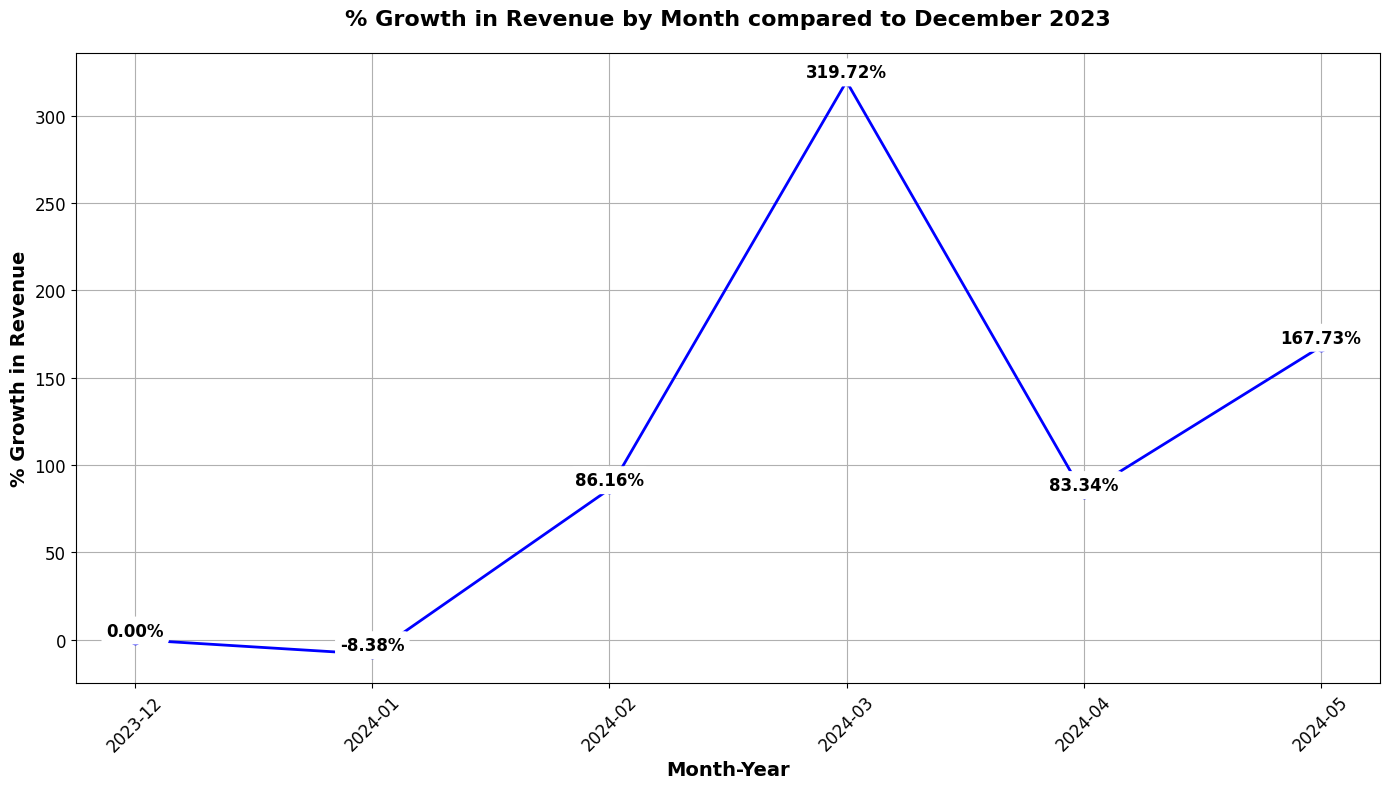

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Exclude specific transaction IDs
exclude_ids = [153, 154, 1030, 4857, 6557, 12007, 13699, 14876, 18582, 28289, 31424]
df = df[~df['id'].isin(exclude_ids)]

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Filter the data for the period from December 2023 to May 2024
start_date = '2023-12-01'
end_date = '2024-05-31'
df = df[(df['created_at'] >= start_date) & (df['created_at'] <= end_date)]

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Filter for valid transactions
valid_transactions_df = df[df['transaction_status'] == 2]

# Calculate the total transaction amount for each month
monthly_revenue = valid_transactions_df.groupby('month_year').agg(
    total_revenue=('transaction_total', 'sum')
).reset_index()

# Normalize the revenue for May 2024 to reflect a full month
may_2024_days = valid_transactions_df[valid_transactions_df['month_year'] == '2024-05']['created_at'].dt.day.max()
days_in_may = 31
may_2024_revenue = monthly_revenue[monthly_revenue['month_year'] == '2024-05']['total_revenue'].values[0]
normalized_may_2024_revenue = (may_2024_revenue / may_2024_days) * days_in_may
monthly_revenue.loc[monthly_revenue['month_year'] == '2024-05', 'total_revenue'] = normalized_may_2024_revenue

# Calculate the percentage growth in revenue by month compared to December 2023
dec_2023_revenue = monthly_revenue[monthly_revenue['month_year'] == '2023-12']['total_revenue'].values[0]
monthly_revenue['pct_growth_revenue'] = ((monthly_revenue['total_revenue'] - dec_2023_revenue) / dec_2023_revenue) * 100

# Print the percentage growth in revenue by month
print("Percentage Growth in Revenue by Month compared to December 2023:")
print(monthly_revenue[['month_year', 'pct_growth_revenue']])

# Plot percentage growth in revenue by month with improved aesthetics
plt.figure(figsize=(14, 8))
plt.plot(monthly_revenue['month_year'].astype(str), monthly_revenue['pct_growth_revenue'], marker='o', linestyle='-', color='b', linewidth=2)

plt.xlabel('Month-Year', fontsize=14, fontweight='bold')
plt.ylabel('% Growth in Revenue', fontsize=14, fontweight='bold')
plt.title('% Growth in Revenue by Month compared to December 2023', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adding data point labels
for i, row in monthly_revenue.iterrows():
    label = f'{row["pct_growth_revenue"]:.2f}%'
    plt.text(i, row['pct_growth_revenue'], label, ha='center', va='bottom', fontsize=12, fontweight='bold', color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv
Monthly profit from December 2023 to April 2024:
  month_year       profit
0    2023-12   808557.275
1    2024-01   740795.235
2    2024-02  1505176.395
3    2024-03  3393714.640
4    2024-04  1406311.045


/tmp/ipykernel_33/1768590070.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_transactions_df['adjusted_transaction_total'] = valid_transactions_df['transaction_total'] / 10


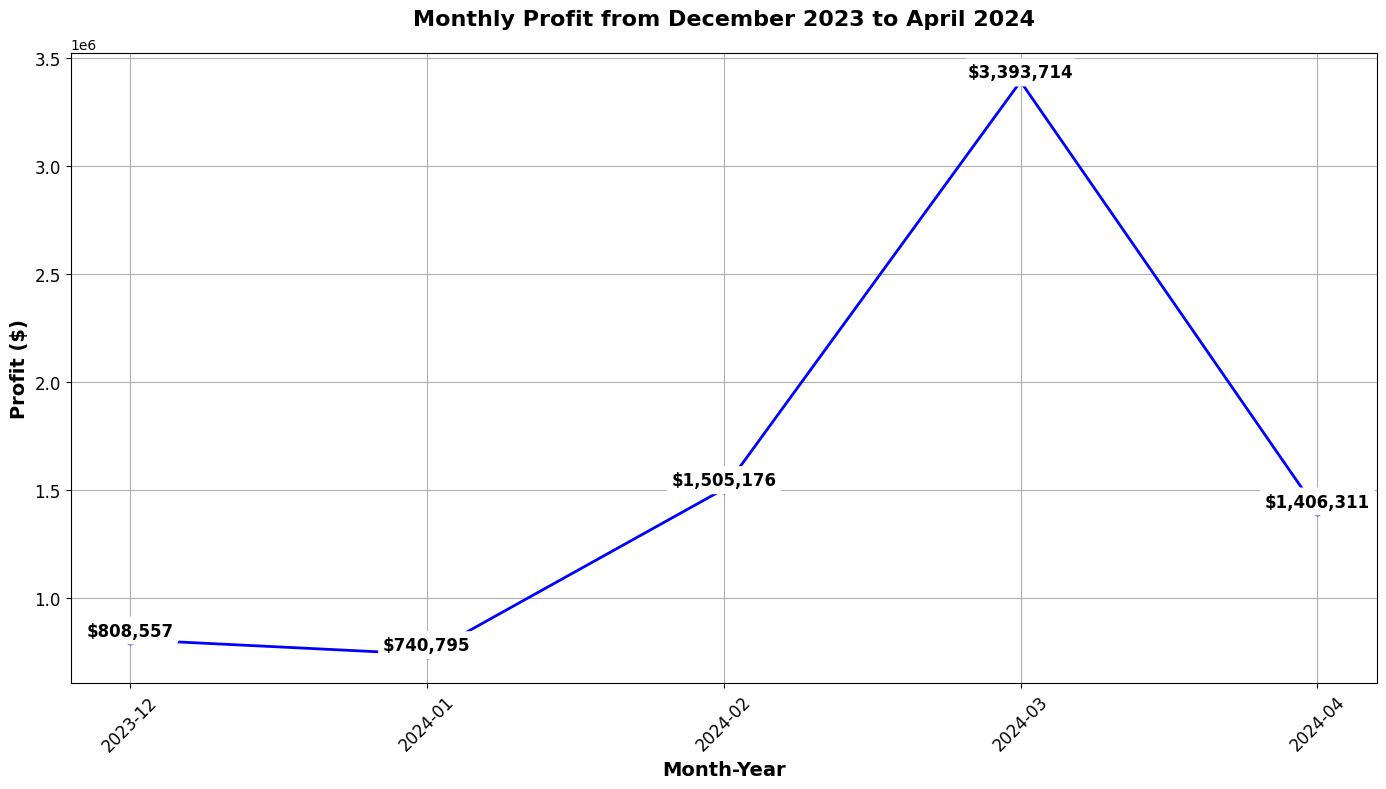

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Exclude specific transaction IDs
exclude_ids = [153, 154, 1030, 4857, 6557, 12007, 13699, 14876, 18582, 28289, 31424]
df = df[~df['id'].isin(exclude_ids)]

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Filter the data for the period from December 2023 to April 2024
start_date = '2023-12-01'
end_date = '2024-04-30'
df = df[(df['created_at'] >= start_date) & (df['created_at'] <= end_date)]

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Filter for valid transactions
valid_transactions_df = df[df['transaction_status'] == 2]

# Adjust the transaction values
valid_transactions_df['adjusted_transaction_total'] = valid_transactions_df['transaction_total'] / 10

# Calculate the monthly revenue and profit
monthly_revenue = valid_transactions_df.groupby('month_year')['adjusted_transaction_total'].sum().reset_index()
monthly_revenue['profit'] = monthly_revenue['adjusted_transaction_total'] * 0.05

# Print the monthly profit
print("Monthly profit from December 2023 to April 2024:")
print(monthly_revenue[['month_year', 'profit']])

# Plot the monthly profit with improved aesthetics
plt.figure(figsize=(14, 8))
plt.plot(monthly_revenue['month_year'].astype(str), monthly_revenue['profit'], marker='o', linestyle='-', color='b', linewidth=2)

plt.xlabel('Month-Year', fontsize=14, fontweight='bold')
plt.ylabel('Profit ($)', fontsize=14, fontweight='bold')
plt.title('Monthly Profit from December 2023 to April 2024', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adding data point labels
for i, row in monthly_revenue.iterrows():
    label = f'${int(row["profit"]):,}'
    plt.text(i, row['profit'], label, ha='center', va='bottom', fontsize=12, fontweight='bold', color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv


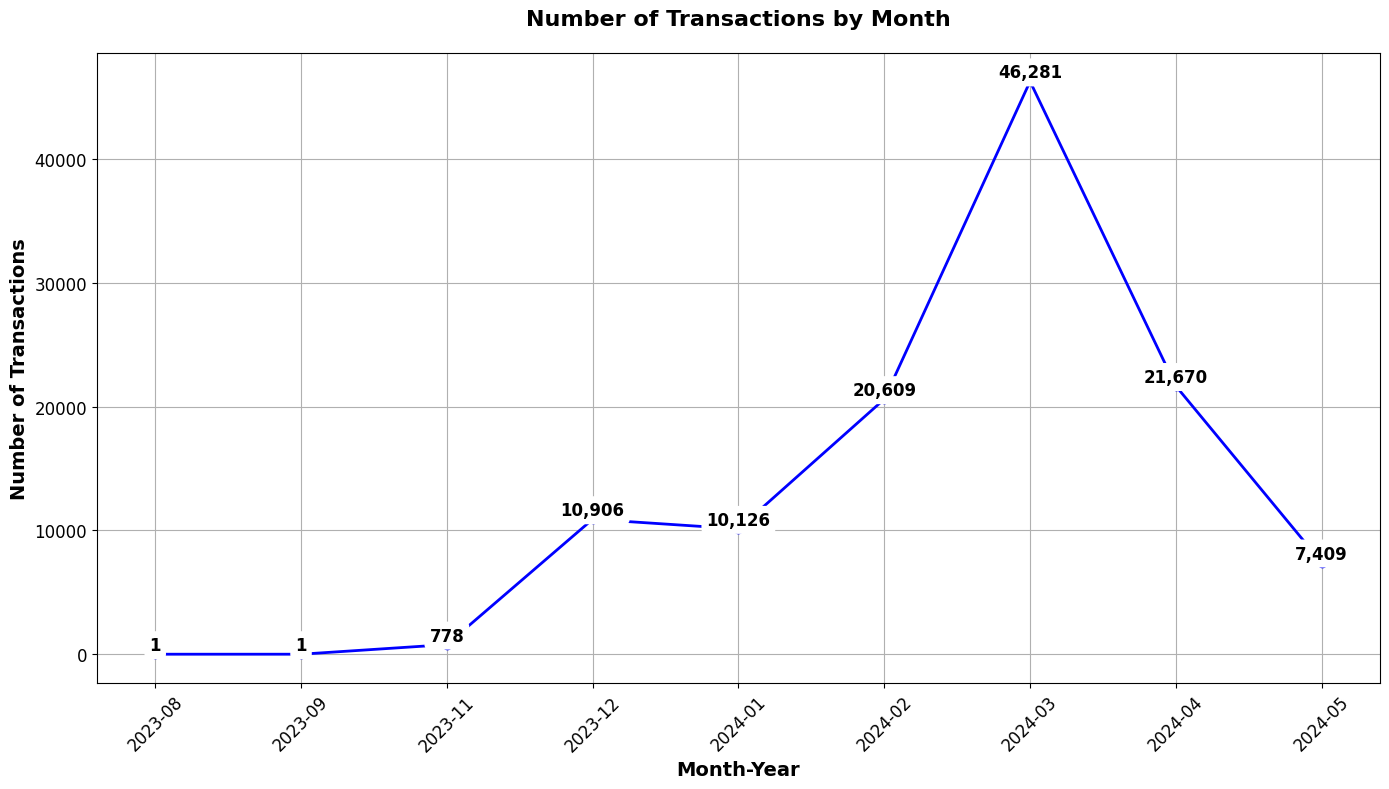

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Calculate the number of transactions by month
transactions_by_month = df.groupby('month_year')['id'].count().reset_index(name='transaction_count')

# Plot the number of transactions by month
plt.figure(figsize=(14, 8))
plt.plot(transactions_by_month['month_year'].astype(str), transactions_by_month['transaction_count'], marker='o', linestyle='-', color='b', linewidth=2)
plt.xlabel('Month-Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Transactions', fontsize=14, fontweight='bold')
plt.title('Number of Transactions by Month', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adding data point labels
for i, row in transactions_by_month.iterrows():
    plt.text(i, row['transaction_count'], f'{row["transaction_count"]:,}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv


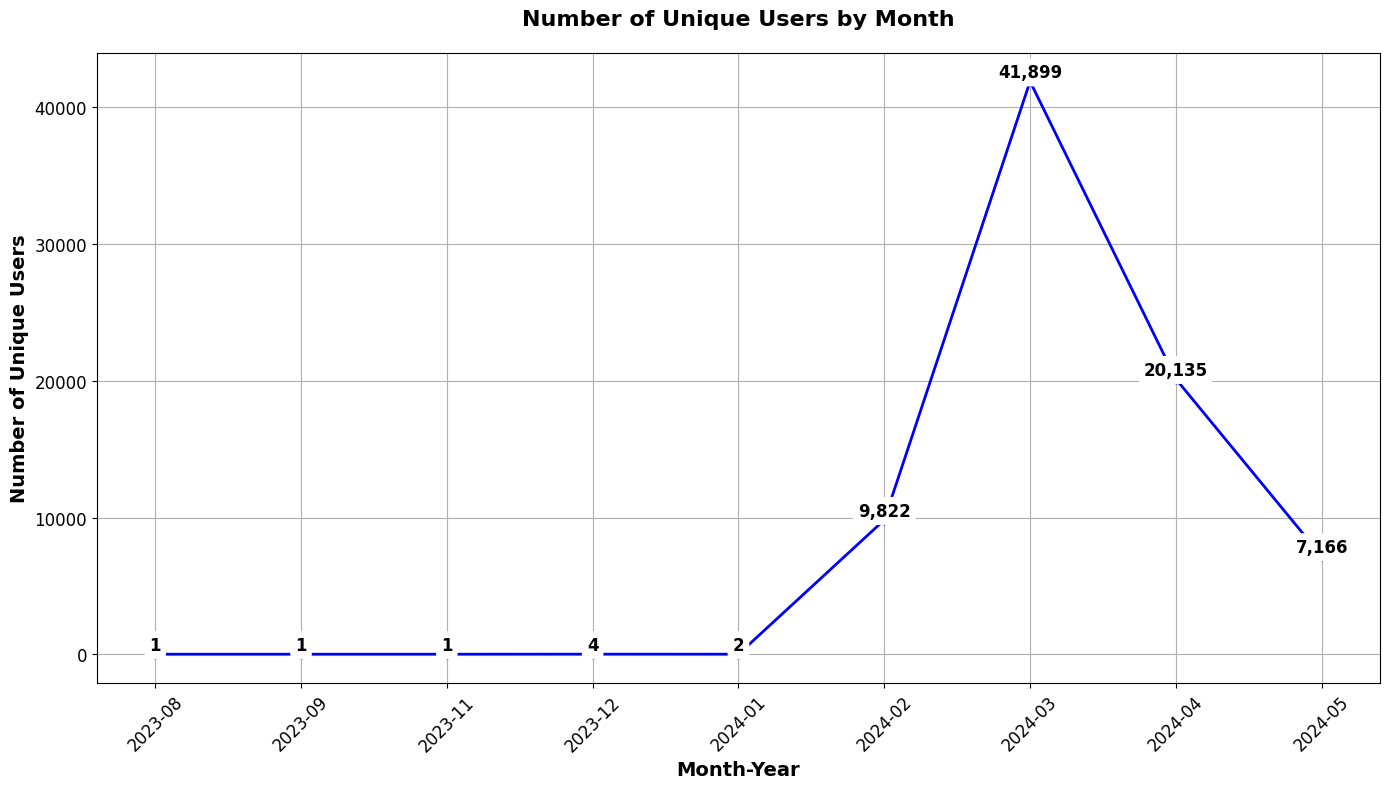

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Calculate the number of unique users by month
unique_users_by_month = df.groupby('month_year')['buyer_id'].nunique().reset_index(name='unique_user_count')

# Plot the number of unique users by month
plt.figure(figsize=(14, 8))
plt.plot(unique_users_by_month['month_year'].astype(str), unique_users_by_month['unique_user_count'], marker='o', linestyle='-', color='b', linewidth=2)
plt.xlabel('Month-Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Unique Users', fontsize=14, fontweight='bold')
plt.title('Number of Unique Users by Month', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adding data point labels
for i, row in unique_users_by_month.iterrows():
    plt.text(i, row['unique_user_count'], f'{row["unique_user_count"]:,}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()


/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv


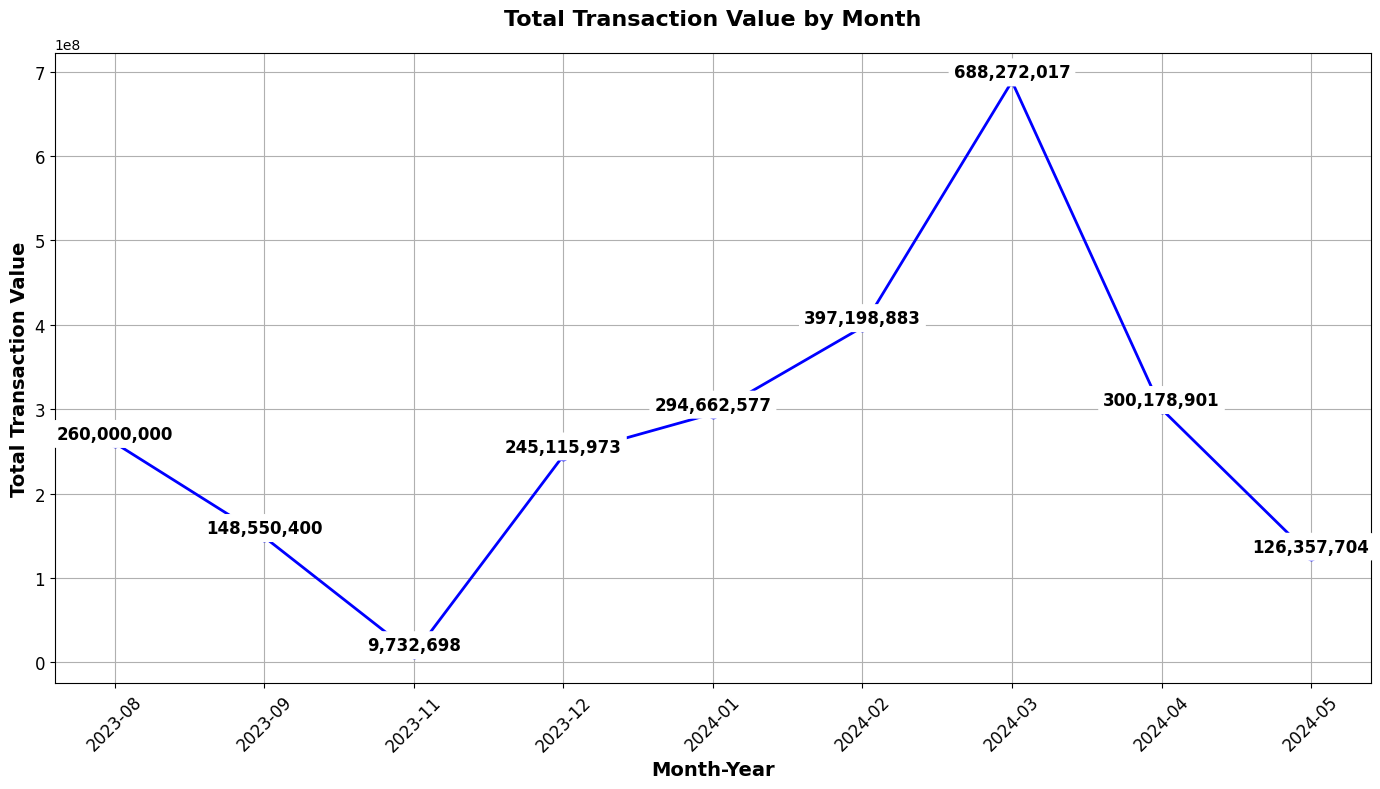

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# List all files in the input directory to confirm the file path
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset from the specified path
file_path = '/kaggle/input/payme-sababa-orig-file/sababakids_dataset_csv_origfie.csv'
df = pd.read_csv(file_path)

# Convert 'created_at' from epoch milliseconds to datetime
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms')

# Add a 'month_year' column for monthly aggregation
df['month_year'] = df['created_at'].dt.to_period('M')

# Calculate the total transaction value by month
total_transaction_value_by_month = df.groupby('month_year')['transaction_total'].sum().reset_index(name='total_transaction_value')

# Plot the total transaction value by month
plt.figure(figsize=(14, 8))
plt.plot(total_transaction_value_by_month['month_year'].astype(str), total_transaction_value_by_month['total_transaction_value'], marker='o', linestyle='-', color='b', linewidth=2)
plt.xlabel('Month-Year', fontsize=14, fontweight='bold')
plt.ylabel('Total Transaction Value', fontsize=14, fontweight='bold')
plt.title('Total Transaction Value by Month', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Adding data point labels
for i, row in total_transaction_value_by_month.iterrows():
    plt.text(i, row['total_transaction_value'], f'{row["total_transaction_value"]:,}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.show()
